**Problem Statement**

In this project, we embark on a journey to decipher the sentiment embedded within the vast landscape of tweets concerning the renowned tech giant, Apple. Our overarching objective is to unearth the nuanced public perception swirling around the company by meticulously analyzing the sentiment conveyed through these social media snippets.

Harnessing the power of Twitter data, we aim to extract invaluable insights that shed light on the collective sentiment towards Apple. However, amidst the sea of tweets lies the challenge of discerning between positive and negative sentiments with unwavering accuracy.

Therefore, the crux of our endeavor lies in crafting a robust classification model, one that not only navigates through the labyrinth of tweets but also effectively delineates the underlying emotions—be they brimming with admiration or tinged with criticism.

Our mission is  to construct a reliable classification model capable of meticulously categorizing tweets discussing Apple as either positive or negative; and second, to leverage this model to delve deeper into the collective psyche of Twitter users, unraveling the intricate tapestry of sentiments woven around this iconic brand.

By achieving this feat, we aspire to offer more than just a glimpse into public sentiment; we aim to present a comprehensive understanding of the diverse array of emotions tethered to Apple, thus empowering stakeholders with invaluable insights to inform strategic decisions and foster stronger connections with their audience.


In [1]:
## Importing the necessary libraries along with the standard import

import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib
import warnings 
warnings.filterwarnings( "ignore")

In [2]:
## Let us check the version of the various libraries
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.24.3
Pandas version: 2.0.3
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.8.1
Matplotlib version: 3.7.2


# Naive Bayes Classifier.
Now, let us load the data and look at a few other text mining functionalities that Python offers us and then go on to fit a classifier algorithm.

In [3]:
## Loading the dataset
Apple_tweets = pd.read_csv("/Users/sumangowda/Downloads/Apple_tweets.csv")

In [4]:
Apple_tweets.head()

,Tweet,Avg
0,"I have to say, Apple has by far the best custo...",2.0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0
2,LOVE U @APPLE,1.8
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8
4,.@apple has the best customer service. In and ...,1.8


In [5]:
Apple_tweets.shape

(1181, 2)

In [6]:
Apple_tweets['Avg'].max()

2.0

In [7]:
Apple_tweets['Avg'].min()

-2.0

## Basic Exploration in Text Mining

### Number of words

**To create a temporary function lambda can be used. These functions do not require a name like a def function, however the output is same as defining a permanent function**
**As these function are temporary, memory comsumption is less in comparison to permanent function. Also there are multiple ways to get a similar output**


In [8]:
## Let's get a word count without writing a lambda function

Apple_tweets['totalwords'] = [len(x.split()) for x in Apple_tweets['Tweet']]
Apple_tweets[['Tweet','totalwords']].head()

,Tweet,totalwords
0,"I have to say, Apple has by far the best custo...",19
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,10
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",11
4,.@apple has the best customer service. In and ...,16


In [9]:
Apple_tweets['word_count'] = Apple_tweets['Tweet'].apply(lambda x: len(str(x).split(" ")))
Apple_tweets[['Tweet','word_count']].head()

,Tweet,word_count
0,"I have to say, Apple has by far the best custo...",19
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,10
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",12
4,.@apple has the best customer service. In and ...,16


### Number of Characters- including spaces

In [10]:
Apple_tweets['char_count'] = Apple_tweets['Tweet'].str.len()
Apple_tweets[['Tweet','char_count']].head()

,Tweet,char_count
0,"I have to say, Apple has by far the best custo...",101
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,60
2,LOVE U @APPLE,13
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",91
4,.@apple has the best customer service. In and ...,82


### Average Word Length

In [11]:
def avg_word(sentence):
    words = sentence.split() #splitting the words separately from the input taken
    return (sum(len(word) for word in words)/len(words)) # getting the average number of words in the each of the entries

Apple_tweets['avg_word'] = Apple_tweets['Tweet'].apply(lambda x: avg_word(x))
Apple_tweets[['Tweet','avg_word']].head()

,Tweet,avg_word
0,"I have to say, Apple has by far the best custo...",4.368421
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,5.100000
2,LOVE U @APPLE,3.666667
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",7.272727
4,.@apple has the best customer service. In and ...,4.187500


### Number of stop Words

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

Apple_tweets['stopwords'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
Apple_tweets[['Tweet','stopwords']].head()

,Tweet,stopwords
0,"I have to say, Apple has by far the best custo...",6
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",2
4,.@apple has the best customer service. In and ...,8


### Number of special character

In [13]:
Apple_tweets['hastags'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
Apple_tweets[['Tweet','hastags']].head()

,Tweet,hastags
0,"I have to say, Apple has by far the best custo...",0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,1
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",2
4,.@apple has the best customer service. In and ...,0


### Number of numerics

In [14]:
# Regular expression requires 2 input- what to find & from where to find
Apple_tweets['numerics'] = Apple_tweets['Tweet'].apply(lambda x: len(re.findall('[0-9]',x)))
Apple_tweets[['Tweet','numerics']].head()

,Tweet,numerics
0,"I have to say, Apple has by far the best custo...",0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,1
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",3
4,.@apple has the best customer service. In and ...,2


### Number of Uppercase Words

In [15]:
Apple_tweets['upper'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
Apple_tweets[['Tweet','upper']].head()

,Tweet,upper
0,"I have to say, Apple has by far the best custo...",2
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,0
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1
4,.@apple has the best customer service. In and ...,0


### Number of Uppercase Letters

In [16]:
Apple_tweets['upper_letter'] = Apple_tweets['Tweet'].apply(lambda x: len(re.findall('[A-Z]',x)))
Apple_tweets[['Tweet','upper_letter']].head()

,Tweet,upper_letter
0,"I have to say, Apple has by far the best custo...",6
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,5
2,LOVE U @APPLE,10
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",9
4,.@apple has the best customer service. In and ...,1


In [17]:
Apple_tweets.head()

,Tweet,Avg,totalwords,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,upper_letter
0,"I have to say, Apple has by far the best custo...",2.0,19,19,101,4.368421,6,0,0,2,6
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0,10,10,60,5.100000,2,1,1,0,5
2,LOVE U @APPLE,1.8,3,3,13,3.666667,0,0,0,3,10
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8,11,12,91,7.272727,2,2,3,1,9
4,.@apple has the best customer service. In and ...,1.8,16,16,82,4.187500,8,0,2,0,1


## Basic Pre-Processing

### Lower Case conversion

In [18]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Apple_tweets['Tweet'].head()

0    i have to say, apple has by far the best custo...
1    ios 7 is so fricking smooth & beautiful!! #tha...
2                                        love u @apple
3    thank you @apple, loving my new iphone 5s!!!!!...
4    .@apple has the best customer service. in and ...
Name: Tweet, dtype: object

### Removal of Punctuation

In [19]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
Apple_tweets['Tweet'].head()

0    i have to say, apple has by far the best custo...
1    ios 7 is so fricking smooth & beautiful!! #tha...
2                                        love u @apple
3    thank you @apple, loving my new iphone 5s!!!!!...
4    .@apple has the best customer service. in and ...
Name: Tweet, dtype: object

### Removal of StopWords

In [20]:
#nltk.download('stopwords')

In [21]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Apple_tweets['Tweet'].head()

0    say, apple far best customer care service ever...
1    ios 7 fricking smooth & beautiful!! #thanxappl...
2                                        love u @apple
3    thank @apple, loving new iphone 5s!!!!! #apple...
4      .@apple best customer service. new phone 10min!
Name: Tweet, dtype: object

### Common Words Removal
1. **We will create a list of 10 frequently occuring words and then decide if we need to remove it or retain it.**
2. **Reason is that this file has tweets related to Apple.. So no point in keeping the word like Apple, unless we have tweets from other brands**

In [22]:
freq = pd.Series(' '.join(Apple_tweets['Tweet']).split()).value_counts()[:10]
freq

@apple     1030
iphone      162
new         111
#apple       86
5s           70
#ipod        67
#ipad        66
#itunes      64
#iphone      63
phone        59
Name: count, dtype: int64

In [23]:
# Creating a list of most frequent words, this can me removed if not adding value
freq =['apple','get']

1. **As we are talking about multiple products hence iphone will be kept, similarly some tweets do relate to old products without mentioning the word old, hence even new would be kept in the tweets.**
2. **hence only apple and get would be removed**

In [24]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
Apple_tweets['Tweet'].head()

0    say, far best customer care service ever recei...
1    ios 7 fricking smooth & beautiful!! #thanxappl...
2                                        love u @apple
3    thank @apple, loving new iphone 5s!!!!! #apple...
4      .@apple best customer service. new phone 10min!
Name: Tweet, dtype: object

### Rare Words Removal
**This is done as association of these less occurring words with the existing words could be a noise**

In [25]:
freq = pd.Series(' '.join(Apple_tweets['Tweet']).split()).value_counts()[-10:]
freq
## As it is difficult to make out if these words will have association in text analytics or not, 
## hence to start with these words are kept in the dataset

#telecelchitchat      1
@zifmstereo           1
kinda                 1
inspiration           1
unveils               1
#nfc                  1
http://ow.ly/olcgw    1
@rasna_j              1
@jmflooores           1
nasty!                1
Name: count, dtype: int64

### Stemming -refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

In [26]:
from nltk.stem import WordNetLemmatizer  # Lemmatizing
from nltk.stem import PorterStemmer     # Stemming

In [27]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
Apple_tweets['Tweet'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0       say, far best custom care servic ever received...
1        io 7 frick smooth & beautiful!! #thanxappl @appl
2                                            love u @appl
3       thank @apple, love new iphon 5s!!!!! #appl #ip...
4            .@appl best custom service. new phone 10min!
                              ...                        
1176                                          freak @appl
1177    cant freak see pictur tl im annoy freak @twitt...
1178                                @appl freak cow freak
1179                   @appl hate phone work i'm go freak
1180            @agounalaki that' nasty! @appl nasti brat
Name: Tweet, Length: 1181, dtype: object

In [28]:
def Tweet(x):
    if x >= 0:
        return "Positive"
    else: return "Negative"


### Now to get the sentiments as positive and negative , convert the Avg column . If value is >= 0  then tweet is Positive, else tweet is Negative. This will make a dependent variable as a binary classifier

In [29]:
Apple_tweets["Sentiment"] = Apple_tweets["Avg"].apply(Tweet)

Apple_tweets.head()

,Tweet,Avg,totalwords,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,upper_letter,Sentiment
0,"say, far best customer care service ever recei...",2.0,19,19,101,4.368421,6,0,0,2,6,Positive
1,ios 7 fricking smooth & beautiful!! #thanxappl...,2.0,10,10,60,5.100000,2,1,1,0,5,Positive
2,love u @apple,1.8,3,3,13,3.666667,0,0,0,3,10,Positive
3,"thank @apple, loving new iphone 5s!!!!! #apple...",1.8,11,12,91,7.272727,2,2,3,1,9,Positive
4,.@apple best customer service. new phone 10min!,1.8,16,16,82,4.187500,8,0,2,0,1,Positive


In [30]:
Apple_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweet         1181 non-null   object 
 1   Avg           1181 non-null   float64
 2   totalwords    1181 non-null   int64  
 3   word_count    1181 non-null   int64  
 4   char_count    1181 non-null   int64  
 5   avg_word      1181 non-null   float64
 6   stopwords     1181 non-null   int64  
 7   hastags       1181 non-null   int64  
 8   numerics      1181 non-null   int64  
 9   upper         1181 non-null   int64  
 10  upper_letter  1181 non-null   int64  
 11  Sentiment     1181 non-null   object 
dtypes: float64(2), int64(8), object(2)
memory usage: 110.8+ KB


## Let's look at distribution of different sentiments

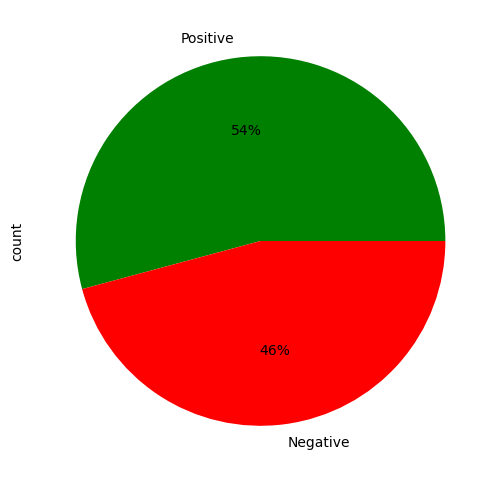

In [31]:
plt.figure(figsize=(8,6))
Apple_tweets.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green","red"])
plt.show()

In [32]:
Apple_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweet         1181 non-null   object 
 1   Avg           1181 non-null   float64
 2   totalwords    1181 non-null   int64  
 3   word_count    1181 non-null   int64  
 4   char_count    1181 non-null   int64  
 5   avg_word      1181 non-null   float64
 6   stopwords     1181 non-null   int64  
 7   hastags       1181 non-null   int64  
 8   numerics      1181 non-null   int64  
 9   upper         1181 non-null   int64  
 10  upper_letter  1181 non-null   int64  
 11  Sentiment     1181 non-null   object 
dtypes: float64(2), int64(8), object(2)
memory usage: 110.8+ KB


In [33]:
Apple_tweets.head()

,Tweet,Avg,totalwords,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,upper_letter,Sentiment
0,"say, far best customer care service ever recei...",2.0,19,19,101,4.368421,6,0,0,2,6,Positive
1,ios 7 fricking smooth & beautiful!! #thanxappl...,2.0,10,10,60,5.100000,2,1,1,0,5,Positive
2,love u @apple,1.8,3,3,13,3.666667,0,0,0,3,10,Positive
3,"thank @apple, loving new iphone 5s!!!!! #apple...",1.8,11,12,91,7.272727,2,2,3,1,9,Positive
4,.@apple best customer service. new phone 10min!,1.8,16,16,82,4.187500,8,0,2,0,1,Positive


In [34]:
processed_features = Apple_tweets.iloc[:, 0].values
labels = Apple_tweets.iloc[:, 11].values

In [35]:
processed_features

array(['say, far best customer care service ever received! @apple @appstore',
       'ios 7 fricking smooth & beautiful!! #thanxapple @apple',
       'love u @apple', ..., '@apple freaking cows freak',
       "@apple hate phone working i'm going freak",
       "@agounalakis that's nasty! @apple nasty brat"], dtype=object)

In [36]:
labels

array(['Positive', 'Positive', 'Positive', ..., 'Negative', 'Negative',
       'Negative'], dtype=object)

## TfidfVectorizer

More here - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [38]:
processed_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
vectorizer

TfidfVectorizer(max_df=0.8, max_features=2500, min_df=7)

In [40]:
## Extra Knowledge Bytes (TF-IDF)
## TF= No of rep of words in a sentence/No of words in a sentence
##IDF= Log(no of sentences/No sentences containing this particular word)
# Let's see how our TD-IDF looks like (sorting by the feature named 5s)
# Creating the TF-IDF with the feature names given by the TFIDF vectorizer, sorting it for unerstanding.
# Let's chain the .head() method on the DataFrame to inspect the first few observations of the TD-IDF sorted by '5s'
pd.DataFrame(processed_features, columns = vectorizer.get_feature_names_()).sort_values(by = '5s', ascending=False).head(10)

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names_'

## Train-Test split

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.3, random_state=0)

In [42]:
y_train

array(['Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positi

# Gaussian Naive Bayes

In [43]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [44]:
NB_model = GaussianNB(var_smoothing=1e-15)
NB_model.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-15)

In [45]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.7566585956416465
[[176 190]
 [ 11 449]]
              precision    recall  f1-score   support

    Negative       0.94      0.48      0.64       366
    Positive       0.70      0.98      0.82       460

    accuracy                           0.76       826
   macro avg       0.82      0.73      0.73       826
weighted avg       0.81      0.76      0.74       826



In [46]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.6591549295774648
[[ 81  94]
 [ 27 153]]
              precision    recall  f1-score   support

    Negative       0.75      0.46      0.57       175
    Positive       0.62      0.85      0.72       180

    accuracy                           0.66       355
   macro avg       0.68      0.66      0.64       355
weighted avg       0.68      0.66      0.65       355



In [47]:
# Training Data Probability Prediction
pred_prob_train = NB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = NB_model.predict_proba(X_test)

In [48]:
pred_prob_train

array([[1.00000000e+000, 0.00000000e+000],
       [4.51977579e-052, 1.00000000e+000],
       [6.12779991e-133, 1.00000000e+000],
       ...,
       [2.04922385e-073, 1.00000000e+000],
       [1.52338137e-222, 1.00000000e+000],
       [1.87896306e-050, 1.00000000e+000]])

In [49]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve

AUC: 0.743


In [50]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs,pos_label='Positive')

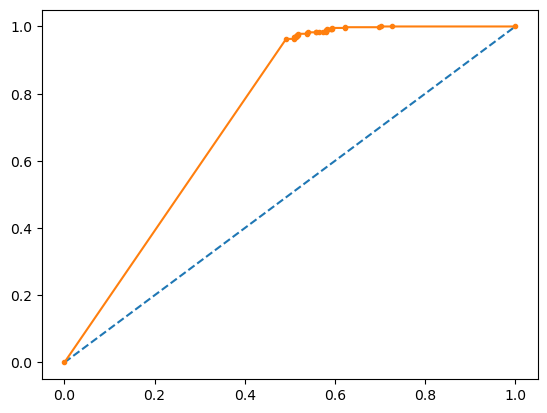

In [51]:
# AUC and ROC for the training data

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC for the Training Data: 0.743
AUC for the Test Data: 0.680


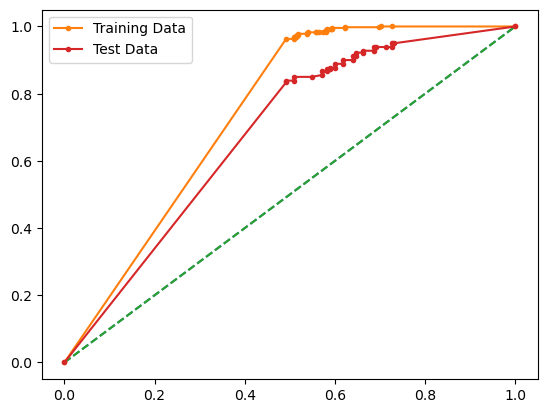

In [52]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1],pos_label='Positive')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1],pos_label='Positive')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

**Pl. note - Model building is an iterative process. Model performance both on the test and train dataset can be improved using feature engineering, feature extraction, hyper parameter tuning (including combination of various parameters).** 

**Model has to match the business objective and hence various permutation and combinations can be tried on to refine the model**

## Creating a Wordcloud

In [53]:
# Recall Apple_Tweets['Tweet'] from above. It has been processed at a basic level!

Apple_tweets['Tweet'].iloc[30:31] #Checking a tweet at random!

30    dear @apple, love new default alarm ringtone. ...
Name: Tweet, dtype: object

In [54]:
# Removing symbols and punctuations 
# further_clean = Apple_tweets['Tweet'].str.replace('[^\w\s]','')
# stop_words.remove()  To remove words from the list of stop words
# Extending the list of stop words (including words like Apple, bitly, dear, please, etc.)
stop_words = list(stopwords.words('english'))
stop_words.extend(["apple", "http","bit","bitly","bit ly", "dear", "im", "i'm", "please"])

In [55]:
#Removing stop words (extended list as above) from the corpus 

corpus = Apple_tweets['Tweet'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus

0       say, far best customer care service ever recei...
1       ios 7 fricking smooth & beautiful!! #thanxappl...
2                                           love u @apple
3       thank @apple, loving new iphone 5s!!!!! #apple...
4         .@apple best customer service. new phone 10min!
                              ...                        
1176                                         freak @apple
1177    cant freaking see pictures tl annoyed freak @t...
1178                           @apple freaking cows freak
1179                @apple hate phone working going freak
1180         @agounalakis that's nasty! @apple nasty brat
Name: Tweet, Length: 1181, dtype: object

In [56]:
wc_a = ' '.join(corpus)

In [57]:
wc_a

'say, far best customer care service ever received! @apple @appstore ios 7 fricking smooth & beautiful!! #thanxapple @apple love u @apple thank @apple, loving new iphone 5s!!!!! #apple #iphone5s pic.twitter.com/xmhjcu4pcb .@apple best customer service. new phone 10min! @apple ear pods amazing! best sound in-ear headphones i\'ve ever had! omg iphone 5s cool read finger print unlock iphone 5s make purchases without passcode #apple @apple iphone 5c beautiful <3 @apple #attributeownership exactly @apple always #one! #apple #marketing #marketer #business #innovation #fb checked specs new ios 7...wow say! can\'t wait new update ?? bravo @apple love new ios much!!!!! thnx @apple @phillydvibing can\'t wait #iphone5s!!! @apple @v2vista fingerprint scanner: killer feature iphone 5s. bloody brilliant. @apple @timesnow http://toi.in/w0o-3z interesting many people seem almost willing demise @apple. what\'s going on? still far favorite #brand. fantastic love @bnbuzz @nookstudy @nookbn @apple made li

In [58]:
##pip install wordcloud

Word Cloud for Apple_Tweets (after cleaning)!!


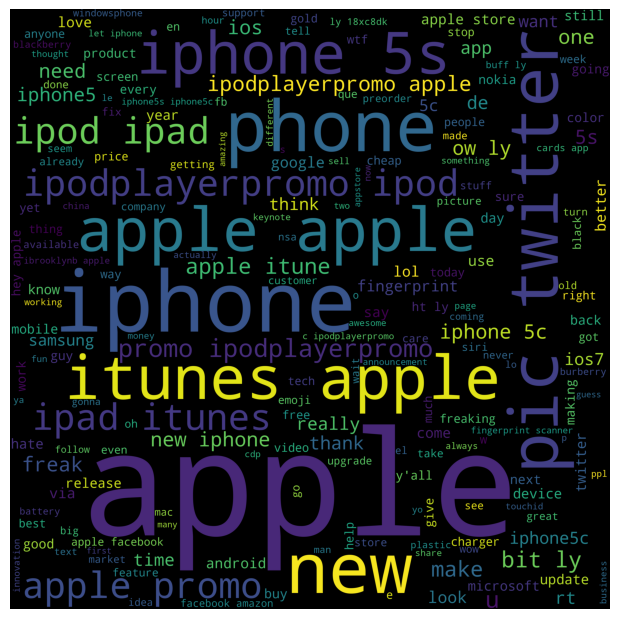

In [59]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Apple_Tweets (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

# END

In [60]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/sumangowda/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

In [61]:
from nltk.corpus import inaugural

In [62]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [63]:
df_obama=inaugural.raw('2009-Obama.txt')
df_obama

'My fellow citizens:\n\nI stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition.\n\nForty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace. Yet, every so often the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because We the People have remained faithful to the ideals of our forbearers, and true to our founding documents.\n\nSo it has been. So it must be with this generation of Americans.\n\nThat we are in the midst of crisis is now well understood. Our nation is at war, against a far-reaching network of violence and hatred. Our economy is badly weakened

In [64]:
# Splitting the data
split_df_obama=df_obama.split('\n\n')

In [65]:
split_df_obama

['My fellow citizens:',
 'I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition.',
 'Forty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace. Yet, every so often the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because We the People have remained faithful to the ideals of our forbearers, and true to our founding documents.',
 'So it has been. So it must be with this generation of Americans.',
 'That we are in the midst of crisis is now well understood. Our nation is at war, against a far-reaching network of violence and hatred. Our economy is badly wea

In [66]:
df_text_obama=pd.DataFrame(split_df_obama)
df_text_obama

,0
0,My fellow citizens:
1,I stand here today humbled by the task before ...
2,Forty-four Americans have now taken the presid...
3,So it has been. So it must be with this genera...
4,That we are in the midst of crisis is now well...
5,"These are the indicators of crisis, subject to..."
6,Today I say to you that the challenges we face...
7,"On this day, we gather because we have chosen ..."
8,"On this day, we come to proclaim an end to the..."
9,"We remain a young nation, but in the words of ..."


In [67]:
stop_words = list(stopwords.words('english'))

In [68]:
df_text_obama.columns=['Speech']

In [69]:
df_text_obama.head()

,Speech
0,My fellow citizens:
1,I stand here today humbled by the task before ...
2,Forty-four Americans have now taken the presid...
3,So it has been. So it must be with this genera...
4,That we are in the midst of crisis is now well...


In [70]:
from nltk.tokenize import word_tokenize #word tokenizer

In [71]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sumangowda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [72]:
from wordcloud import WordCloud, STOPWORDS

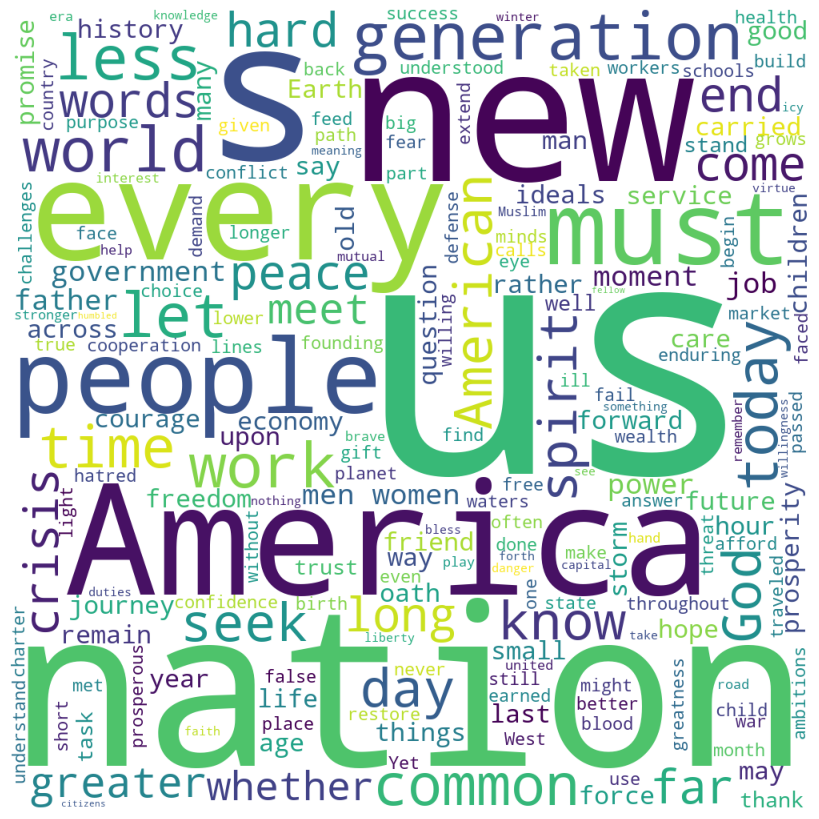

In [73]:
stop_words = set(stopwords.words('english'))  #intialise stopwords from English Language

filtered_sentence = [] #empty list
for i in df_text_obama['Speech']: # iterating in processes features through each sentence
    word_tokens = word_tokenize(i) # converting each sentence to a token
    for w in word_tokens:#in each token, removing stopwords from english language
        if w not in stop_words:
            filtered_sentence.append(w) #appending non-stopwords to filtered_sentence list

comment_words = ' ' #empty string
stop_words = set(STOPWORDS) #stopwords from Wordcloud

for words in filtered_sentence:
    comment_words = comment_words + words + ' ' #converting to string
          
            
wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 